In [1]:
import pandas as pd
from preprocessing import Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

First we will import the CSV data - we will use the famous Iris dataset.  
We will also devide the train and test datasets and get X,y values for both.

In [2]:
train_filepath = 'data/iris_train_set.csv'
test_filepath = 'data/iris_test_set.csv'

train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)

In [3]:
ytrain = train_data['iris_type']
Xtrain = train_data.drop(['iris_type'], axis=1)
ytest = test_data['iris_type']
Xtest = test_data.drop(['iris_type'], axis=1)

print("Size of Xtrain:", Xtrain.shape)
print("Size of ytrain:", ytrain.shape)
print("Size of Xtest:", Xtest.shape)
print("Size of ytest:", ytest.shape)

Size of Xtrain: (120, 4)
Size of ytrain: (120,)
Size of Xtest: (30, 4)
Size of ytest: (30,)


Now, lets scale the data using my scaler and sklearn Scaler, and compare the result

In [4]:
sklearn_scaler = MinMaxScaler().fit_transform(Xtrain)
sklearn_scaler = pd.DataFrame(sklearn_scaler, columns = Xtrain.columns)
my_scaler = Scaler('minmax').fit_transform(Xtrain)

In [5]:
correct = True
for i in range(sklearn_scaler.shape[0]):
    for j in range(sklearn_scaler.shape[1]):

        if round(sklearn_scaler.iloc[i,j],10) != round(my_scaler.iloc[i,j],10) :
            correct = False
            print("Wrong value at:", i,j)

if correct:
    print("All values are matching")

All values are matching


Define comparing function:

In [6]:
def compare(vec1, vec2):
        """
        Comparing between two vector of same length\n
        Can be used to determine accuracy between prediction and actual test values. 
        """

        if len(vec1) != len(vec2):
                raise ValueError("Length of vectors must be the same")
                
        correct = (vec1 == vec2).sum()
        accuracy = correct / vec2.shape[0]
        return accuracy

Good!  
Now lets try the ML algorithms :

For all algorithms, I will train both mine and sklearn models and compare using comapre() function defined above.

### GNB

In [7]:
from sklearn.naive_bayes import GaussianNB
from models import GNB

In [8]:
my_gnb = GNB()
my_gnb.fit(Xtrain, ytrain)

sklearn_gnb = GaussianNB()
sklearn_gnb.fit(Xtrain, ytrain)

GaussianNB()

In [9]:
print("Some info from my GNB: \n")
print("Class list: ", my_gnb.cls_list)
print("Class priors: ", my_gnb.cls_priors)
print("\n---------------------Mean Likelihood----------------------")
print(my_gnb.mean_likelihood)
print("\n---------------------Std Likelihood----------------------")
print(my_gnb.std_likelihood)

Some info from my GNB: 

Class list:  [0, 1, 2]
Class priors:  [0.3416666666666667, 0.325, 0.3333333333333333]

---------------------Mean Likelihood----------------------
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0          0.200861         0.588415          0.075651         0.058943
1          0.488688         0.325855          0.555845         0.511752
2          0.648529          0.39375           0.75678         0.796875

---------------------Std Likelihood----------------------
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0          0.110618         0.164885          0.027617         0.043676
1          0.146844         0.134463           0.08494          0.08862
2          0.176339         0.131067           0.08965         0.112908


In [10]:
my_pred = my_gnb.predict(Xtest)
sklearn_pred = sklearn_gnb.predict(Xtest)

In [11]:
print("my_pred accuracy: ",compare(my_pred, ytest))
print("sklearn_pred accuracy: ",compare(sklearn_pred, ytest))
print("Accuracy between my_pred and sklearn_pred: ",compare(my_pred, sklearn_pred))

my_pred accuracy:  0.03333333333333333
sklearn_pred accuracy:  0.3333333333333333
Accuracy between my_pred and sklearn_pred:  0.26666666666666666


### KNN

In [12]:
from models import KNN
from sklearn.neighbors import KNeighborsClassifier

In [13]:
my_knn = KNN(neighbors = 3, distance_metric = 'euclidean')
sklearn_knn = KNeighborsClassifier(3,p=2)

In [14]:
my_knn.fit(Xtrain, ytrain)
sklearn_knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [15]:
my_pred = my_knn.predict(Xtest)
sklearn_pred = sklearn_knn.predict(Xtest)

In [16]:
print("my_pred accuracy: ",compare(my_pred, ytest))
print("sklearn_pred accuracy: ",compare(sklearn_pred, ytest))
print("Accuracy between my_pred and sklearn_pred: ",compare(my_pred, sklearn_pred))

my_pred accuracy:  0.3333333333333333
sklearn_pred accuracy:  0.3333333333333333
Accuracy between my_pred and sklearn_pred:  1.0


### KMeans

In [17]:
from models import KMeans 
from sklearn.cluster import KMeans as SL_KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

We will create random blobs on a graph and run the algorithm to find clusters

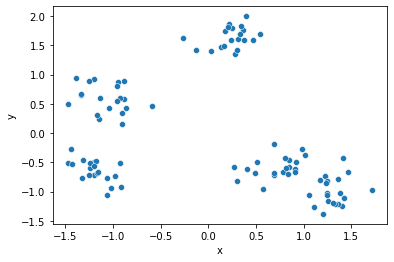

In [18]:
centers = 5

X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=23)
X_train = StandardScaler().fit_transform(X_train)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                # hue=true_labels,
                palette="deep",
                legend=None
                )
                
plt.xlabel("x")
plt.ylabel("y")
plt.show()

I will run my KMeans algorithm and use style to seperate between the clusters 

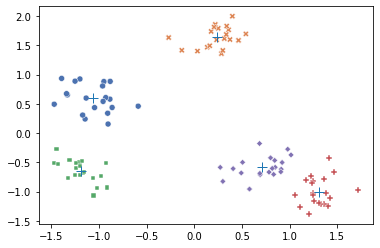

In [22]:
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate()
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()

We can see we found our 5 centers using KMeans! 

Good job! :)